# PCA with Regression and Column Transformer

The final iteration using Principal Component Analysis, a ColumnTransformer and a Transformed Target Regressor ended up being the best model for our team, and the 2nd best score in the class competition! 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from IPython.core.display import HTML

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

%matplotlib inline

In [2]:
perm_train = pd.read_csv('data/train.csv')
#perm_test = pd.read_csv('data/test.csv')


In [3]:
perm_train.head(3)

,permeability,phi,s,tau,Fss_1,Fss_2,Fss_3,Fss_4,Fss_5,Fss_6,Fss_7,Fss_8,Fss_9,Fss_10,Fss_11,Fss_12,Fss_13,Fss_14,Fss_15,Fss_16,Fss_17,Fss_18,Fss_19,Fss_20,Fss_21,Fss_22,Fss_23,Fss_24,Fss_25,Fss_26,Fss_27,Fss_28,Fss_29,Fss_30,Fss_31,Fss_32,Fss_33,Fss_34,Fss_35,Fss_36,Fss_37,Fss_38,Fss_39,Fss_40,Fss_41,Fss_42,Fss_43,Fss_44,Fss_45,Fss_46,Fss_47,Fss_48,Fss_49,Fss_50,Fss_51,Fss_52,Fss_53,Fss_54,Fss_55,Fss_56,Fss_57,Fss_58,Fss_59,Fss_60,Fss_61,Fss_62,Fss_63,Fss_64,Fss_65,Fss_66,Fss_67,Fss_68,Fss_69,Fss_70,Fss_71,Fss_72,Fss_73,Fss_74,Fss_75,Fss_76,Fss_77,Fss_78,Fss_79,Fss_80,Fss_81,Fss_82,Fss_83,Fss_84,Fss_85,Fss_86,Fss_87,Fss_88,Fss_89,Fss_90,Fss_91,Fss_92,Fss_93,Fss_94,Fss_95,Fss_96,Fsv_1,Fsv_2,Fsv_3,Fsv_4,Fsv_5,Fsv_6,Fsv_7,Fsv_8,Fsv_9,Fsv_10,Fsv_11,Fsv_12,Fsv_13,Fsv_14,Fsv_15,Fsv_16,Fsv_17,Fsv_18,Fsv_19,Fsv_20,Fsv_21,Fsv_22,Fsv_23,Fsv_24,Fsv_25,Fsv_26,Fsv_27,Fsv_28,Fsv_29,Fsv_30,Fsv_31,Fsv_32,Fsv_33,Fsv_34,Fsv_35,Fsv_36,Fsv_37,Fsv_38,Fsv_39,Fsv_40,Fsv_41,Fsv_42,Fsv_43,Fsv_44,Fsv_45,Fsv_46,Fsv_47,Fsv_48,Fsv_49,Fsv_50,Fsv_51,Fsv_52,Fsv_53,Fsv_54,Fsv_55,Fsv_56,Fsv_57,Fsv_58,Fsv_59,Fsv_60,Fsv_61,Fsv_62,Fsv_63,Fsv_64,Fsv_65,Fsv_66,Fsv_67,Fsv_68,Fsv_69,Fsv_70,Fsv_71,Fsv_72,Fsv_73,Fsv_74,Fsv_75,Fsv_76,Fsv_77,Fsv_78,Fsv_79,Fsv_80,Fsv_81,Fsv_82,Fsv_83,Fsv_84,Fsv_85,Fsv_86,Fsv_87,Fsv_88,Fsv_89,Fsv_90,Fsv_91,Fsv_92,Fsv_93,Fsv_94,Fsv_95,Fsv_96,Fvv_1,Fvv_2,Fvv_3,Fvv_4,Fvv_5,Fvv_6,Fvv_7,Fvv_8,Fvv_9,Fvv_10,Fvv_11,Fvv_12,Fvv_13,Fvv_14,Fvv_15,Fvv_16,Fvv_17,Fvv_18,Fvv_19,Fvv_20,Fvv_21,Fvv_22,Fvv_23,Fvv_24,Fvv_25,Fvv_26,Fvv_27,Fvv_28,Fvv_29,Fvv_30,Fvv_31,Fvv_32,Fvv_33,Fvv_34,Fvv_35,Fvv_36,Fvv_37,Fvv_38,Fvv_39,Fvv_40,Fvv_41,Fvv_42,Fvv_43,Fvv_44,Fvv_45,Fvv_46,Fvv_47,Fvv_48,Fvv_49,Fvv_50,Fvv_51,Fvv_52,Fvv_53,Fvv_54,Fvv_55,Fvv_56,Fvv_57,Fvv_58,Fvv_59,Fvv_60,Fvv_61,Fvv_62,Fvv_63,Fvv_64,Fvv_65,Fvv_66,Fvv_67,Fvv_68,Fvv_69,Fvv_70,Fvv_71,Fvv_72,Fvv_73,Fvv_74,Fvv_75,Fvv_76,Fvv_77,Fvv_78,Fvv_79,Fvv_80,Fvv_81,Fvv_82,Fvv_83,Fvv_84,Fvv_85,Fvv_86,Fvv_87,Fvv_88,Fvv_89,Fvv_90,Fvv_91,Fvv_92,Fvv_93,Fvv_94,Fvv_95,Fvv_96
0,1.50168,0.348046,0.066175,1.076254,0.218608,0.016738,0.013973,0.010761,0.007845,0.006058,0.005476,0.005539,0.005026,0.004522,0.004665,0.004721,0.004447,0.004528,0.004234,0.004380,0.004208,0.004163,0.004348,0.004313,0.004182,0.004052,0.004156,0.004193,0.004028,0.004366,0.004200,0.004087,0.004292,0.004131,0.004324,0.004343,0.004350,0.004459,0.004286,0.004518,0.004131,0.004585,0.004282,0.004404,0.004611,0.004650,0.004666,0.004981,0.004804,0.004836,0.004471,0.004367,0.004345,0.004552,0.004236,0.004391,0.004351,0.004151,0.004162,0.004227,0.004337,0.004182,0.004252,0.004373,0.004118,0.004319,0.004317,0.004380,0.004290,0.004185,0.004233,0.004285,0.004426,0.004184,0.004317,0.004563,0.004265,0.004270,0.004411,0.004475,0.004399,0.004434,0.004403,0.004501,0.004426,0.004864,0.004585,0.004400,0.004524,0.004467,0.004750,0.004489,0.004698,0.004357,0.004387,0.004416,0.004138,0.004434,0.004582,0.004357,0.033205,0.032735,0.032449,0.032201,0.032051,0.031701,0.031136,0.030602,0.030004,0.029191,0.028450,0.027550,0.026782,0.026007,0.025410,0.024647,0.024070,0.023457,0.022967,0.022578,0.022223,0.021916,0.021673,0.021409,0.021124,0.020993,0.021028,0.020999,0.020964,0.020873,0.021040,0.021173,0.021344,0.021496,0.021635,0.021892,0.022168,0.022461,0.022695,0.022892,0.023236,0.023379,0.023698,0.023989,0.024346,0.024709,0.024918,0.024912,0.024900,0.024656,0.024731,0.024424,0.024224,0.024068,0.024003,0.023924,0.023662,0.023528,0.023501,0.023329,0.023271,0.023186,0.023067,0.022896,0.022733,0.022656,0.022548,0.022508,0.022344,0.022465,0.022307,0.022462,0.022491,0.022552,0.022628,0.022768,0.022779,0.022842,0.022993,0.023138,0.023272,0.023271,0.023435,0.023409,0.023621,0.023599,0.023657,0.023634,0.023752,0.023805,0.023685,0.023738,0.023760,0.023782,0.023865,0.023861,0.337385,0.321478,0.306604,0.290951,0.274696,0.260208,0.244991,0.231361,0.217903,0.205853,0.194452,0.182540,0.173192,0.164498,0.156047,0.149169,0.142525,0.136362,0.131388,0.126601,0.122591,0.119673,0.117293,0.114182,0.1126

In [4]:
perm_train.shape

(25000, 292)

In [5]:
# filter_col = [col for col in perm_train if col.startswith('Fss_')]
# print(filter_col)

In [6]:
perm_train = perm_train.rename(columns = {'phi':'porosity', 's':'surface', 'tau':'tortuosity'})


In [7]:
perm_train.head(3)

,permeability,porosity,surface,tortuosity,Fss_1,Fss_2,Fss_3,Fss_4,Fss_5,Fss_6,Fss_7,Fss_8,Fss_9,Fss_10,Fss_11,Fss_12,Fss_13,Fss_14,Fss_15,Fss_16,Fss_17,Fss_18,Fss_19,Fss_20,Fss_21,Fss_22,Fss_23,Fss_24,Fss_25,Fss_26,Fss_27,Fss_28,Fss_29,Fss_30,Fss_31,Fss_32,Fss_33,Fss_34,Fss_35,Fss_36,Fss_37,Fss_38,Fss_39,Fss_40,Fss_41,Fss_42,Fss_43,Fss_44,Fss_45,Fss_46,Fss_47,Fss_48,Fss_49,Fss_50,Fss_51,Fss_52,Fss_53,Fss_54,Fss_55,Fss_56,Fss_57,Fss_58,Fss_59,Fss_60,Fss_61,Fss_62,Fss_63,Fss_64,Fss_65,Fss_66,Fss_67,Fss_68,Fss_69,Fss_70,Fss_71,Fss_72,Fss_73,Fss_74,Fss_75,Fss_76,Fss_77,Fss_78,Fss_79,Fss_80,Fss_81,Fss_82,Fss_83,Fss_84,Fss_85,Fss_86,Fss_87,Fss_88,Fss_89,Fss_90,Fss_91,Fss_92,Fss_93,Fss_94,Fss_95,Fss_96,Fsv_1,Fsv_2,Fsv_3,Fsv_4,Fsv_5,Fsv_6,Fsv_7,Fsv_8,Fsv_9,Fsv_10,Fsv_11,Fsv_12,Fsv_13,Fsv_14,Fsv_15,Fsv_16,Fsv_17,Fsv_18,Fsv_19,Fsv_20,Fsv_21,Fsv_22,Fsv_23,Fsv_24,Fsv_25,Fsv_26,Fsv_27,Fsv_28,Fsv_29,Fsv_30,Fsv_31,Fsv_32,Fsv_33,Fsv_34,Fsv_35,Fsv_36,Fsv_37,Fsv_38,Fsv_39,Fsv_40,Fsv_41,Fsv_42,Fsv_43,Fsv_44,Fsv_45,Fsv_46,Fsv_47,Fsv_48,Fsv_49,Fsv_50,Fsv_51,Fsv_52,Fsv_53,Fsv_54,Fsv_55,Fsv_56,Fsv_57,Fsv_58,Fsv_59,Fsv_60,Fsv_61,Fsv_62,Fsv_63,Fsv_64,Fsv_65,Fsv_66,Fsv_67,Fsv_68,Fsv_69,Fsv_70,Fsv_71,Fsv_72,Fsv_73,Fsv_74,Fsv_75,Fsv_76,Fsv_77,Fsv_78,Fsv_79,Fsv_80,Fsv_81,Fsv_82,Fsv_83,Fsv_84,Fsv_85,Fsv_86,Fsv_87,Fsv_88,Fsv_89,Fsv_90,Fsv_91,Fsv_92,Fsv_93,Fsv_94,Fsv_95,Fsv_96,Fvv_1,Fvv_2,Fvv_3,Fvv_4,Fvv_5,Fvv_6,Fvv_7,Fvv_8,Fvv_9,Fvv_10,Fvv_11,Fvv_12,Fvv_13,Fvv_14,Fvv_15,Fvv_16,Fvv_17,Fvv_18,Fvv_19,Fvv_20,Fvv_21,Fvv_22,Fvv_23,Fvv_24,Fvv_25,Fvv_26,Fvv_27,Fvv_28,Fvv_29,Fvv_30,Fvv_31,Fvv_32,Fvv_33,Fvv_34,Fvv_35,Fvv_36,Fvv_37,Fvv_38,Fvv_39,Fvv_40,Fvv_41,Fvv_42,Fvv_43,Fvv_44,Fvv_45,Fvv_46,Fvv_47,Fvv_48,Fvv_49,Fvv_50,Fvv_51,Fvv_52,Fvv_53,Fvv_54,Fvv_55,Fvv_56,Fvv_57,Fvv_58,Fvv_59,Fvv_60,Fvv_61,Fvv_62,Fvv_63,Fvv_64,Fvv_65,Fvv_66,Fvv_67,Fvv_68,Fvv_69,Fvv_70,Fvv_71,Fvv_72,Fvv_73,Fvv_74,Fvv_75,Fvv_76,Fvv_77,Fvv_78,Fvv_79,Fvv_80,Fvv_81,Fvv_82,Fvv_83,Fvv_84,Fvv_85,Fvv_86,Fvv_87,Fvv_88,Fvv_89,Fvv_90,Fvv_91,Fvv_92,Fvv_93,Fvv_94,Fvv_95,Fvv_96
0,1.50168,0.348046,0.066175,1.076254,0.218608,0.016738,0.013973,0.010761,0.007845,0.006058,0.005476,0.005539,0.005026,0.004522,0.004665,0.004721,0.004447,0.004528,0.004234,0.004380,0.004208,0.004163,0.004348,0.004313,0.004182,0.004052,0.004156,0.004193,0.004028,0.004366,0.004200,0.004087,0.004292,0.004131,0.004324,0.004343,0.004350,0.004459,0.004286,0.004518,0.004131,0.004585,0.004282,0.004404,0.004611,0.004650,0.004666,0.004981,0.004804,0.004836,0.004471,0.004367,0.004345,0.004552,0.004236,0.004391,0.004351,0.004151,0.004162,0.004227,0.004337,0.004182,0.004252,0.004373,0.004118,0.004319,0.004317,0.004380,0.004290,0.004185,0.004233,0.004285,0.004426,0.004184,0.004317,0.004563,0.004265,0.004270,0.004411,0.004475,0.004399,0.004434,0.004403,0.004501,0.004426,0.004864,0.004585,0.004400,0.004524,0.004467,0.004750,0.004489,0.004698,0.004357,0.004387,0.004416,0.004138,0.004434,0.004582,0.004357,0.033205,0.032735,0.032449,0.032201,0.032051,0.031701,0.031136,0.030602,0.030004,0.029191,0.028450,0.027550,0.026782,0.026007,0.025410,0.024647,0.024070,0.023457,0.022967,0.022578,0.022223,0.021916,0.021673,0.021409,0.021124,0.020993,0.021028,0.020999,0.020964,0.020873,0.021040,0.021173,0.021344,0.021496,0.021635,0.021892,0.022168,0.022461,0.022695,0.022892,0.023236,0.023379,0.023698,0.023989,0.024346,0.024709,0.024918,0.024912,0.024900,0.024656,0.024731,0.024424,0.024224,0.024068,0.024003,0.023924,0.023662,0.023528,0.023501,0.023329,0.023271,0.023186,0.023067,0.022896,0.022733,0.022656,0.022548,0.022508,0.022344,0.022465,0.022307,0.022462,0.022491,0.022552,0.022628,0.022768,0.022779,0.022842,0.022993,0.023138,0.023272,0.023271,0.023435,0.023409,0.023621,0.023599,0.023657,0.023634,0.023752,0.023805,0.023685,0.023738,0.023760,0.023782,0.023865,0.023861,0.337385,0.321478,0.306604,0.290951,0.274696,0.260208,0.244991,0.231361,0.217903,0.205853,0.194452,0.182540,0.173192,0.164498,0.156047,0.149169,0.142525,0.136362,0.131388,0.126601,0.122591,0.119673,0.1172

In [8]:
perm_train[['permeability', 'porosity', 'surface', 'tortuosity']].describe()

,permeability,porosity,surface,tortuosity
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,6.075263,0.500430,0.091840,1.073649
std,8.900660,0.114615,0.047575,0.034259
min,0.066919,0.300051,0.022440,1.017753
25%,1.130768,0.400620,0.057358,1.047005
50%,2.908265,0.499313,0.078292,1.065551
75%,7.290040,0.600121,0.111331,1.092075
max,128.229000,0.699973,0.277778,1.322032


In [9]:
perm_train[['permeability',  'porosity', 'surface', 'tortuosity']].corr()

,permeability,porosity,surface,tortuosity
permeability,1.000000,0.498077,-0.493604,-0.456791
porosity,0.498077,1.000000,-0.053792,-0.851281
surface,-0.493604,-0.053792,1.000000,0.168129
tortuosity,-0.456791,-0.851281,0.168129,1.000000


In [10]:
perm_train.nsmallest(5, 'permeability')

,permeability,porosity,surface,tortuosity,Fss_1,Fss_2,Fss_3,Fss_4,Fss_5,Fss_6,Fss_7,Fss_8,Fss_9,Fss_10,Fss_11,Fss_12,Fss_13,Fss_14,Fss_15,Fss_16,Fss_17,Fss_18,Fss_19,Fss_20,Fss_21,Fss_22,Fss_23,Fss_24,Fss_25,Fss_26,Fss_27,Fss_28,Fss_29,Fss_30,Fss_31,Fss_32,Fss_33,Fss_34,Fss_35,Fss_36,Fss_37,Fss_38,Fss_39,Fss_40,Fss_41,Fss_42,Fss_43,Fss_44,Fss_45,Fss_46,Fss_47,Fss_48,Fss_49,Fss_50,Fss_51,Fss_52,Fss_53,Fss_54,Fss_55,Fss_56,Fss_57,Fss_58,Fss_59,Fss_60,Fss_61,Fss_62,Fss_63,Fss_64,Fss_65,Fss_66,Fss_67,Fss_68,Fss_69,Fss_70,Fss_71,Fss_72,Fss_73,Fss_74,Fss_75,Fss_76,Fss_77,Fss_78,Fss_79,Fss_80,Fss_81,Fss_82,Fss_83,Fss_84,Fss_85,Fss_86,Fss_87,Fss_88,Fss_89,Fss_90,Fss_91,Fss_92,Fss_93,Fss_94,Fss_95,Fss_96,Fsv_1,Fsv_2,Fsv_3,Fsv_4,Fsv_5,Fsv_6,Fsv_7,Fsv_8,Fsv_9,Fsv_10,Fsv_11,Fsv_12,Fsv_13,Fsv_14,Fsv_15,Fsv_16,Fsv_17,Fsv_18,Fsv_19,Fsv_20,Fsv_21,Fsv_22,Fsv_23,Fsv_24,Fsv_25,Fsv_26,Fsv_27,Fsv_28,Fsv_29,Fsv_30,Fsv_31,Fsv_32,Fsv_33,Fsv_34,Fsv_35,Fsv_36,Fsv_37,Fsv_38,Fsv_39,Fsv_40,Fsv_41,Fsv_42,Fsv_43,Fsv_44,Fsv_45,Fsv_46,Fsv_47,Fsv_48,Fsv_49,Fsv_50,Fsv_51,Fsv_52,Fsv_53,Fsv_54,Fsv_55,Fsv_56,Fsv_57,Fsv_58,Fsv_59,Fsv_60,Fsv_61,Fsv_62,Fsv_63,Fsv_64,Fsv_65,Fsv_66,Fsv_67,Fsv_68,Fsv_69,Fsv_70,Fsv_71,Fsv_72,Fsv_73,Fsv_74,Fsv_75,Fsv_76,Fsv_77,Fsv_78,Fsv_79,Fsv_80,Fsv_81,Fsv_82,Fsv_83,Fsv_84,Fsv_85,Fsv_86,Fsv_87,Fsv_88,Fsv_89,Fsv_90,Fsv_91,Fsv_92,Fsv_93,Fsv_94,Fsv_95,Fsv_96,Fvv_1,Fvv_2,Fvv_3,Fvv_4,Fvv_5,Fvv_6,Fvv_7,Fvv_8,Fvv_9,Fvv_10,Fvv_11,Fvv_12,Fvv_13,Fvv_14,Fvv_15,Fvv_16,Fvv_17,Fvv_18,Fvv_19,Fvv_20,Fvv_21,Fvv_22,Fvv_23,Fvv_24,Fvv_25,Fvv_26,Fvv_27,Fvv_28,Fvv_29,Fvv_30,Fvv_31,Fvv_32,Fvv_33,Fvv_34,Fvv_35,Fvv_36,Fvv_37,Fvv_38,Fvv_39,Fvv_40,Fvv_41,Fvv_42,Fvv_43,Fvv_44,Fvv_45,Fvv_46,Fvv_47,Fvv_48,Fvv_49,Fvv_50,Fvv_51,Fvv_52,Fvv_53,Fvv_54,Fvv_55,Fvv_56,Fvv_57,Fvv_58,Fvv_59,Fvv_60,Fvv_61,Fvv_62,Fvv_63,Fvv_64,Fvv_65,Fvv_66,Fvv_67,Fvv_68,Fvv_69,Fvv_70,Fvv_71,Fvv_72,Fvv_73,Fvv_74,Fvv_75,Fvv_76,Fvv_77,Fvv_78,Fvv_79,Fvv_80,Fvv_81,Fvv_82,Fvv_83,Fvv_84,Fvv_85,Fvv_86,Fvv_87,Fvv_88,Fvv_89,Fvv_90,Fvv_91,Fvv_92,Fvv_93,Fvv_94,Fvv_95,Fvv_96
2106,0.066919,0.304210,0.231256,1.162831,1.636142,0.165436,0.092823,0.064983,0.058452,0.059595,0.056724,0.055454,0.054667,0.054695,0.053385,0.054858,0.053120,0.053080,0.054835,0.054313,0.052829,0.056287,0.053703,0.053581,0.054745,0.054474,0.051242,0.053708,0.051981,0.055733,0.053292,0.052752,0.051171,0.054671,0.052564,0.053208,0.053762,0.055076,0.055317,0.053687,0.052526,0.056114,0.055409,0.053761,0.053449,0.054046,0.051618,0.054366,0.053044,0.053539,0.053447,0.052804,0.054573,0.054336,0.053465,0.054502,0.053022,0.055113,0.054090,0.052920,0.054115,0.051962,0.053181,0.052474,0.052448,0.054441,0.054279,0.051939,0.054810,0.053199,0.053707,0.053784,0.053142,0.051914,0.052910,0.052275,0.052544,0.054697,0.052132,0.054447,0.053159,0.052488,0.053795,0.053876,0.053314,0.055704,0.053641,0.054522,0.052527,0.053997,0.055190,0.051740,0.058826,0.054212,0.053874,0.052646,0.053844,0.051922,0.050576,0.051406,0.111874,0.103239,0.095236,0.089883,0.085301,0.081239,0.078560,0.076333,0.074875,0.073912,0.072996,0.072740,0.072273,0.071522,0.071035,0.070606,0.070531,0.070420,0.070236,0.070125,0.069988,0.070027,0.070083,0.070246,0.070585,0.070685,0.070258,0.070196,0.070266,0.070063,0.069915,0.069782,0.069684,0.069464,0.069731,0.069551,0.069509,0.069231,0.069195,0.069487,0.069402,0.069362,0.069766,0.069806,0.069836,0.069896,0.069897,0.069718,0.069746,0.070147,0.069642,0.069892,0.069903,0.069831,0.070006,0.069895,0.069996,0.069908,0.069992,0.069790,0.069896,0.069774,0.070129,0.070185,0.070076,0.069938,0.070523,0.070398,0.070416,0.070324,0.069913,0.069748,0.069270,0.069387,0.069539,0.069835,0.070097,0.070348,0.070557,0.070278,0.070482,0.070156,0.070146,0.070275,0.070192,0.070074,0.070073,0.070273,0.070089,0.070135,0.069954,0.070162,0.070221,0.070465,0.070839,0.070828,0.274106,0.234004,0.199319,0.169674,0.148079,0.131674,0.119985,0.112133,0.106525,0.103389,0.100182,0.098434,0.096893,0.096101,0.095504,0.094788,0.094223,0.094193,0.093833,0.093559,0.093502,0.093413,0.

In [11]:
perm_train.nlargest(5, 'permeability')

,permeability,porosity,surface,tortuosity,Fss_1,Fss_2,Fss_3,Fss_4,Fss_5,Fss_6,Fss_7,Fss_8,Fss_9,Fss_10,Fss_11,Fss_12,Fss_13,Fss_14,Fss_15,Fss_16,Fss_17,Fss_18,Fss_19,Fss_20,Fss_21,Fss_22,Fss_23,Fss_24,Fss_25,Fss_26,Fss_27,Fss_28,Fss_29,Fss_30,Fss_31,Fss_32,Fss_33,Fss_34,Fss_35,Fss_36,Fss_37,Fss_38,Fss_39,Fss_40,Fss_41,Fss_42,Fss_43,Fss_44,Fss_45,Fss_46,Fss_47,Fss_48,Fss_49,Fss_50,Fss_51,Fss_52,Fss_53,Fss_54,Fss_55,Fss_56,Fss_57,Fss_58,Fss_59,Fss_60,Fss_61,Fss_62,Fss_63,Fss_64,Fss_65,Fss_66,Fss_67,Fss_68,Fss_69,Fss_70,Fss_71,Fss_72,Fss_73,Fss_74,Fss_75,Fss_76,Fss_77,Fss_78,Fss_79,Fss_80,Fss_81,Fss_82,Fss_83,Fss_84,Fss_85,Fss_86,Fss_87,Fss_88,Fss_89,Fss_90,Fss_91,Fss_92,Fss_93,Fss_94,Fss_95,Fss_96,Fsv_1,Fsv_2,Fsv_3,Fsv_4,Fsv_5,Fsv_6,Fsv_7,Fsv_8,Fsv_9,Fsv_10,Fsv_11,Fsv_12,Fsv_13,Fsv_14,Fsv_15,Fsv_16,Fsv_17,Fsv_18,Fsv_19,Fsv_20,Fsv_21,Fsv_22,Fsv_23,Fsv_24,Fsv_25,Fsv_26,Fsv_27,Fsv_28,Fsv_29,Fsv_30,Fsv_31,Fsv_32,Fsv_33,Fsv_34,Fsv_35,Fsv_36,Fsv_37,Fsv_38,Fsv_39,Fsv_40,Fsv_41,Fsv_42,Fsv_43,Fsv_44,Fsv_45,Fsv_46,Fsv_47,Fsv_48,Fsv_49,Fsv_50,Fsv_51,Fsv_52,Fsv_53,Fsv_54,Fsv_55,Fsv_56,Fsv_57,Fsv_58,Fsv_59,Fsv_60,Fsv_61,Fsv_62,Fsv_63,Fsv_64,Fsv_65,Fsv_66,Fsv_67,Fsv_68,Fsv_69,Fsv_70,Fsv_71,Fsv_72,Fsv_73,Fsv_74,Fsv_75,Fsv_76,Fsv_77,Fsv_78,Fsv_79,Fsv_80,Fsv_81,Fsv_82,Fsv_83,Fsv_84,Fsv_85,Fsv_86,Fsv_87,Fsv_88,Fsv_89,Fsv_90,Fsv_91,Fsv_92,Fsv_93,Fsv_94,Fsv_95,Fsv_96,Fvv_1,Fvv_2,Fvv_3,Fvv_4,Fvv_5,Fvv_6,Fvv_7,Fvv_8,Fvv_9,Fvv_10,Fvv_11,Fvv_12,Fvv_13,Fvv_14,Fvv_15,Fvv_16,Fvv_17,Fvv_18,Fvv_19,Fvv_20,Fvv_21,Fvv_22,Fvv_23,Fvv_24,Fvv_25,Fvv_26,Fvv_27,Fvv_28,Fvv_29,Fvv_30,Fvv_31,Fvv_32,Fvv_33,Fvv_34,Fvv_35,Fvv_36,Fvv_37,Fvv_38,Fvv_39,Fvv_40,Fvv_41,Fvv_42,Fvv_43,Fvv_44,Fvv_45,Fvv_46,Fvv_47,Fvv_48,Fvv_49,Fvv_50,Fvv_51,Fvv_52,Fvv_53,Fvv_54,Fvv_55,Fvv_56,Fvv_57,Fvv_58,Fvv_59,Fvv_60,Fvv_61,Fvv_62,Fvv_63,Fvv_64,Fvv_65,Fvv_66,Fvv_67,Fvv_68,Fvv_69,Fvv_70,Fvv_71,Fvv_72,Fvv_73,Fvv_74,Fvv_75,Fvv_76,Fvv_77,Fvv_78,Fvv_79,Fvv_80,Fvv_81,Fvv_82,Fvv_83,Fvv_84,Fvv_85,Fvv_86,Fvv_87,Fvv_88,Fvv_89,Fvv_90,Fvv_91,Fvv_92,Fvv_93,Fvv_94,Fvv_95,Fvv_96
3839,128.2290,0.698706,0.022885,1.024469,0.046956,0.001913,0.001419,0.004014,0.002467,0.002017,0.001549,0.001364,0.001412,0.001323,0.001088,0.001005,0.000917,0.001001,0.000913,0.000773,0.000844,0.000750,0.000793,0.000788,0.000626,0.000714,0.000681,0.000671,0.000632,0.000692,0.000686,0.000683,0.000570,0.000627,0.000601,0.000652,0.000535,0.000568,0.000570,0.000562,0.000659,0.000634,0.000646,0.000601,0.000563,0.000593,0.000597,0.000526,0.000595,0.000572,0.000579,0.000584,0.000546,0.000553,0.000582,0.000513,0.000545,0.000575,0.000528,0.000525,0.000522,0.000526,0.000550,0.000531,0.000552,0.000561,0.000539,0.000522,0.000555,0.000530,0.000539,0.000546,0.000510,0.000521,0.000651,0.000564,0.000504,0.000477,0.000462,0.000445,0.000441,0.000391,0.000468,0.000452,0.000490,0.000495,0.000482,0.000479,0.000440,0.000478,0.000501,0.000469,0.000598,0.000539,0.000544,0.000536,0.000578,0.000567,0.000587,0.000571,0.011743,0.011721,0.011787,0.011914,0.012094,0.012230,0.012415,0.012457,0.012618,0.012791,0.012916,0.013069,0.013135,0.013269,0.013357,0.013484,0.013552,0.013653,0.013759,0.013801,0.013864,0.013960,0.014065,0.014121,0.014214,0.014221,0.014300,0.014277,0.014279,0.014292,0.014443,0.014402,0.014508,0.014452,0.014610,0.014593,0.014697,0.014702,0.014673,0.014726,0.014732,0.014813,0.014860,0.014942,0.014912,0.014991,0.015003,0.015120,0.015153,0.015122,0.015273,0.015303,0.015331,0.015395,0.015412,0.015461,0.015570,0.015613,0.015646,0.015743,0.015762,0.015781,0.015914,0.015911,0.016059,0.016117,0.016178,0.016247,0.016285,0.016341,0.016478,0.016479,0.016626,0.016589,0.016653,0.016622,0.016538,0.016516,0.016460,0.016444,0.016349,0.016273,0.016208,0.016166,0.016133,0.016100,0.016063,0.015995,0.015941,0.015923,0.015875,0.015913,0.015834,0.015800,0.015848,0.015825,0.694683,0.689182,0.682932,0.677277,0.672089,0.665385,0.659702,0.653722,0.647235,0.641647,0.636017,0.631684,0.624863,0.619091,0.613595,0.608109,0.603496,0.597644,0.593043,0.587570,0.582830,0.578557,0.

In [12]:
# use all columns of the perm_train dataset.  Drop permeability from X, keep only permeability for y

#Define predictors
X = perm_train.drop('permeability', axis = 1).values

#Define target
y = perm_train['permeability']

In [13]:
# train/test split code here
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [14]:
# LinearRegression code here
linreg = LinearRegression().fit(X_train, y_train)


In [15]:
linreg.predict(X)

array([ 2.99963323,  3.07242735,  6.87439863, ...,  1.44039   ,
       24.45651159,  5.15127258])

In [16]:
mean_squared_error(y_test, linreg.predict(X_test))

8.689234513777649

In [17]:
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

2.9477507550296123

Apply PCA on entire dataset

Reference article: https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [18]:
#apply z-score standardization on train dataset 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [19]:
from sklearn.decomposition import PCA 

In [20]:
pca_291 = PCA(n_components=291, random_state=60)
pca_291.fit(X_scaled)
X_pca_291 = pca_291.transform(X_scaled)

In [21]:
print("Variance explained by all 291 principle components =", 
     sum(pca_291.explained_variance_ratio_*100))

Variance explained by all 291 principle components = 99.99999999999999


In [22]:
pca_291.explained_variance_ratio_*100

array([6.31096611e+01, 3.46262631e+01, 1.77478369e+00, 1.85449650e-01,
       9.67825002e-02, 5.84815397e-02, 3.79095931e-02, 2.03360392e-02,
       1.41469150e-02, 8.95695713e-03, 7.08881103e-03, 4.17747410e-03,
       3.93102902e-03, 2.73546195e-03, 2.32937260e-03, 2.09456959e-03,
       1.76612525e-03, 1.60116236e-03, 1.56676884e-03, 1.50914685e-03,
       1.28390789e-03, 1.04481480e-03, 9.51190960e-04, 8.77310518e-04,
       7.83668962e-04, 6.87617852e-04, 6.43304217e-04, 6.38299864e-04,
       5.83498733e-04, 5.81765182e-04, 5.77418694e-04, 5.48261997e-04,
       5.33553045e-04, 5.11954587e-04, 4.93269427e-04, 4.65294123e-04,
       4.52690139e-04, 4.48871125e-04, 4.44697089e-04, 4.28322520e-04,
       4.14962101e-04, 4.11978734e-04, 4.06226293e-04, 3.97119751e-04,
       3.92161121e-04, 3.90430124e-04, 3.82992695e-04, 3.78664440e-04,
       3.72479964e-04, 3.69896302e-04, 3.65901049e-04, 3.61722349e-04,
       3.57535667e-04, 3.54333959e-04, 3.50747409e-04, 3.48073006e-04,
      

In [23]:
np.cumsum(pca_291.explained_variance_ratio_*100)

array([ 63.10966111,  97.73592417,  99.51070785,  99.6961575 ,
        99.79294   ,  99.85142154,  99.88933113,  99.90966717,
        99.92381409,  99.93277105,  99.93985986,  99.94403733,
        99.94796836,  99.95070382,  99.95303319,  99.95512776,
        99.95689389,  99.95849505,  99.96006182,  99.96157097,
        99.96285487,  99.96389969,  99.96485088,  99.96572819,
        99.96651186,  99.96719948,  99.96784278,  99.96848108,
        99.96906458,  99.96964635,  99.97022376,  99.97077203,
        99.97130558,  99.97181753,  99.9723108 ,  99.9727761 ,
        99.97322879,  99.97367766,  99.97412236,  99.97455068,
        99.97496564,  99.97537762,  99.97578385,  99.97618097,
        99.97657313,  99.97696356,  99.97734655,  99.97772521,
        99.97809769,  99.97846759,  99.97883349,  99.97919521,
        99.97955275,  99.97990708,  99.98025783,  99.9806059 ,
        99.9809509 ,  99.98129491,  99.9816364 ,  99.98197472,
        99.98231108,  99.98264569,  99.98297883,  99.98

In [24]:
print("Variance explained by the First principle component =", 
     np.cumsum(pca_291.explained_variance_ratio_*100)[0])
print("Variance explained by the First 2 principle component =", 
     np.cumsum(pca_291.explained_variance_ratio_*100)[1])
print("Variance explained by the First 3 principle component =", 
     np.cumsum(pca_291.explained_variance_ratio_*100)[2])
print("Variance explained by the First 8 principle component =", 
     np.cumsum(pca_291.explained_variance_ratio_*100)[7])

Variance explained by the First principle component = 63.10966111166626
Variance explained by the First 2 principle component = 97.73592416519273
Variance explained by the First 3 principle component = 99.51070785022009
Variance explained by the First 8 principle component = 99.90966717292359


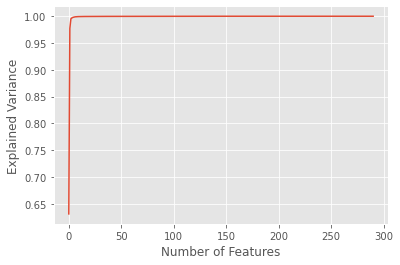

In [25]:
plt.plot(np.cumsum(pca_291.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Explained Variance')
plt.show()

In [27]:
# apply PCA to 3-dimensional subspace, on 99.5% of captured variability
pca_3 = PCA(n_components=3, random_state=60)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

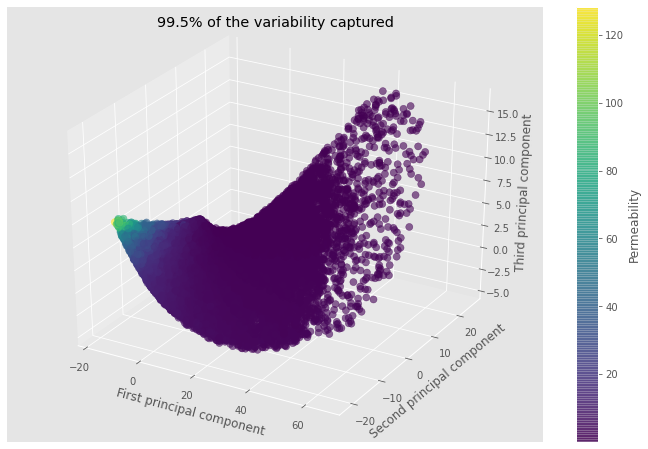

In [86]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection = '3d')
sctt = ax.scatter3D(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2],
                   c=perm_train['permeability'], s=50, alpha=0.6)

plt.title('99.5% of the variability captured', pad=15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')

fig.colorbar(sctt, label = 'Permeability')

plt.show()

#plt.write_html('../kaggle-prmeat/data/3d_pca_permeability.html')
#plt.savefig('data/3d_pca_permeability.pdf')

In [29]:
pca_999 = PCA(n_components = .999, random_state=2020)
pca_999.fit(X_scaled)
X_pca_999 = pca_999.transform(X_scaled)

In [30]:
X_pca_999.shape

(25000, 8)

The algorithm has found 8 principal components to preserve 99.9% of the variability in the data.

In [31]:
#assign a new dataframe with only 8 principal components as the new X 
X= pd.DataFrame(X_pca_999, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
#pca_all_df['perm_predict'] = perm_train['permeability'] 
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-11.178313,10.553231,-0.906720,0.319048,-0.741485,-0.085935,-0.191743,-0.334336
1,-5.943026,10.045817,-1.376212,-0.205664,-1.127873,0.329886,-0.335973,-0.027609
2,-5.560097,-4.030027,-0.269653,0.135847,-0.664074,-0.449077,-0.115317,-0.012345
3,-13.487120,9.829913,-0.244865,0.992867,-0.308984,0.065888,-0.068561,-0.233625
4,-10.389721,10.238696,-1.109578,-0.752933,0.625625,-0.463867,0.276016,0.391766


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     25000 non-null  float64
 1   PC2     25000 non-null  float64
 2   PC3     25000 non-null  float64
 3   PC4     25000 non-null  float64
 4   PC5     25000 non-null  float64
 5   PC6     25000 non-null  float64
 6   PC7     25000 non-null  float64
 7   PC8     25000 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


In [33]:
X.to_csv('data/pca_df2.csv', index=False)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [35]:
perm_train.permeability.skew()
#original, 3.76762936, getting error since setting index to perm_predict "DF has no attribute 'perm_predict'"

3.7676293621087384

In [36]:
np.log(perm_train.permeability).skew()
#np.log(pca_all_df.perm_predict).skew()
#original -0.1405309

-0.140530935712092

In [37]:
linreg=LinearRegression().fit(X_train, np.log(y_train))

In [38]:
np.sqrt(mean_squared_error(y_test, np.exp(linreg.predict(X_test))))
#original 4.74206968

1.791297905701412

In [39]:
mean_absolute_error(y_test, np.exp(linreg.predict(X_test)))
#original 1.83947494

0.48496170808527234

In [40]:
from sklearn.compose import TransformedTargetRegressor

In [41]:
ttr = TransformedTargetRegressor(regressor = LinearRegression(), 
                                 func = np.log, 
                                 inverse_func = np.exp)

In [42]:
ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [43]:
np.sqrt(mean_squared_error(y_test, ttr.predict(X_test)))
#original 4.742069684

1.791297905701412

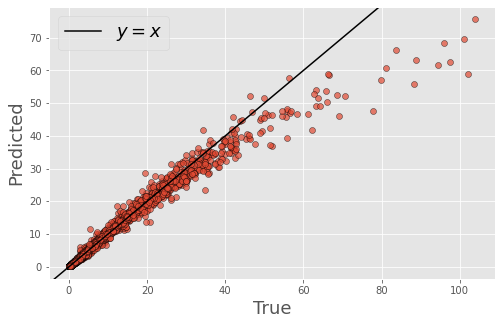

In [44]:
plt.figure(figsize = (8,5))

plt.scatter(y_test, ttr.predict(X_test), alpha = 0.7, edgecolor = 'black')

fontsize = 18
plt.xlabel('True', fontsize = fontsize)
plt.ylabel('Predicted', fontsize = fontsize)

ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

start = min(xmin, ymin)
stop = max(xmax, ymax)
plt.plot([start, stop], [start, stop], color = 'black', label = '$y = x$')
plt.legend(fontsize = fontsize)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [46]:
pipe = Pipeline(steps = [
    ('poly', PolynomialFeatures(degree=3, include_bias = False)),
    ('linreg', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linreg', LinearRegression())])

In [47]:
np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))

0.9157692635137915

In [48]:
mean_absolute_error(y_test, pipe.predict(X_test))

0.327354362527861

In [49]:
mean_absolute_error(y_test, ttr.predict(X_test))
#original 1.83947

0.48496170808527234

In [50]:
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(), ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']),
    #('minmax', MinMaxScaler(), ['lat', 'long']),
    ('poly', PolynomialFeatures(degree = 4, include_bias = False), 
     ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
], remainder = 'passthrough')

pipe = Pipeline(steps = [
    ('transform', ct),
    ('linear', LinearRegression())
])


In [51]:
ttr = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)
ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('transform',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('yeo-johnson',
                                                                                       PowerTransformer(),
                                                                                       ['PC1',
                                                                                        'PC2',
                                                                                        'PC3',
                                                                                        'PC4',
                                                                                        'PC5',
                                                                             

In [52]:
np.sqrt(mean_squared_error(y_test, ttr.predict(X_test)))

0.8542512857973252

In [53]:
mean_absolute_error(y_test, ttr.predict(X_test))

0.2757534566224465

In [55]:
ttr.predict(X)

array([ 1.57495265,  1.00305103,  6.27474494, ...,  0.17320789,
       22.99583343,  5.85545423])

In [56]:
from sklearn.metrics import mean_squared_log_error

In [57]:
np.sqrt(mean_squared_log_error( y_test, ttr.predict(X_test)))

0.041073288522713955

In [58]:
kaggle_testst = pd.read_csv('data/test.csv')

In [59]:
scaled_kaggle = scaler.transform(kaggle_testst)

In [60]:
kaggle_pca_999 = pca_999.transform(scaled_kaggle)

In [61]:
kaggle = pd.DataFrame(kaggle_pca_999, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

In [62]:
ttr.predict(kaggle)

array([38.45895584,  0.91681196,  5.44749024, ...,  4.03300785,
        3.14325673,  0.07985686])

In [63]:
predictions = ttr.predict(kaggle)

In [64]:
sample = pd.read_csv('data/sampleSubmission.csv')
sample

,id,permeability
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
4995,4995,1.0
4996,4996,1.0
4997,4997,1.0
4998,4998,1.0


In [65]:
sample['permeability']=predictions

In [66]:
sample

,id,permeability
0,0,38.458956
1,1,0.916812
2,2,5.447490
3,3,5.353527
4,4,4.530281
...,...,...
4995,4995,0.521053
4996,4996,1.494838
4997,4997,4.033008
4998,4998,3.143257


In [67]:
PrMeaT_submit2=sample.to_csv('data/PrMeaT_submit2.csv', index=False)